<a href="https://colab.research.google.com/github/Prashanna-Raj-Pandit/Neural-Net-Classification-Tensorflow-/blob/main/Image_classification_using_pre_trained_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Image classification using pre-trained ImageNet Models in TensorFlow and Keras
Performing image classification using three different pre-trained models in Keras


*   VGG16
*   ResNet50
*   InceptionV3



In [51]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import matplotlib.image as mpimg

In [69]:
# Store all the image paths in a list.
image_paths = sorted(glob.glob('./images/*'))
print(image_paths)

['./images/bear.png', './images/fish.png', './images/helicopter.jpg', './images/images.jpeg', './images/red_kangaroo-24c18ab08dc145f1a798abd4b820390a.jpg', './images/redfox.jpg', './images/sunflower.jpg', './images/tiger.png']


Visualizing Images Dataset

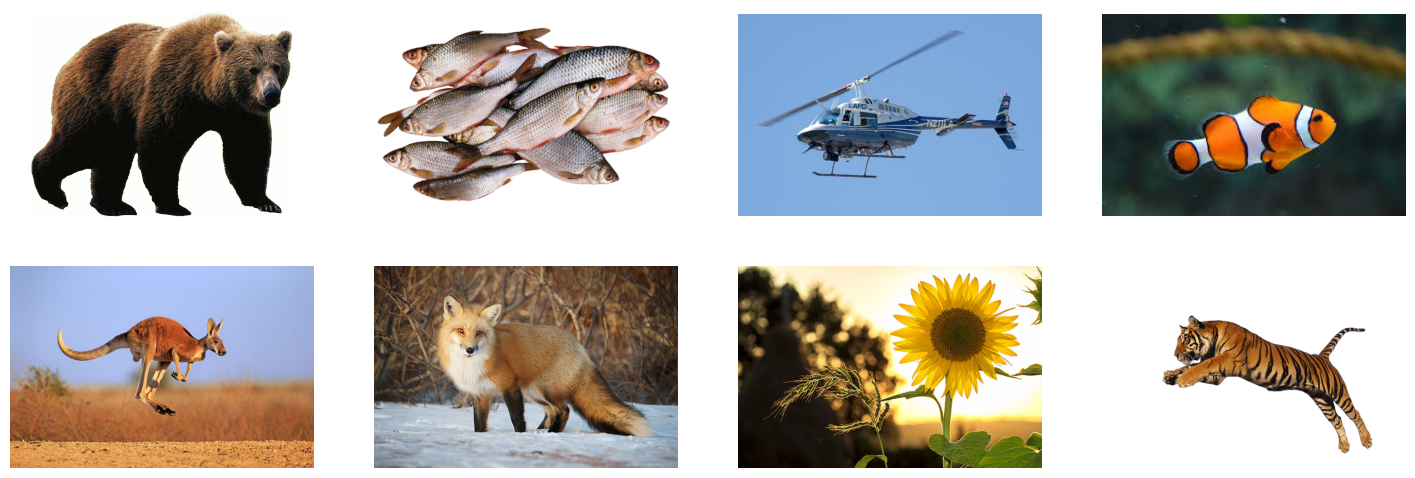

In [70]:
plt.figure(figsize=(18, 6))
for idx, image_path in enumerate(image_paths):
    image = plt.imread(image_path)
    plt.subplot(2,4,idx+1)
    plt.imshow(image)
    plt.axis('off')

Loading pre-trained Models


In [56]:
model_vgg16        = tf.keras.applications.vgg16.VGG16()
model_resnet50     = tf.keras.applications.resnet50.ResNet50()
model_inception_v3 = tf.keras.applications.inception_v3.InceptionV3()

Visualizing input size of each model

In [57]:
print(model_vgg16.input_shape)
print(model_resnet50.input_shape)
print(model_inception_v3.input_shape)

(None, 224, 224, 3)
(None, 224, 224, 3)
(None, 299, 299, 3)


preprocesing and classifying images

In [58]:
def process_images(model, image_paths, size, preprocess_input, display_top_k=False, top_k=2):

    plt.figure(figsize=(20,6))
    for idx, image_path in enumerate(image_paths):

        # Read the image using TensorFlow.
        tf_image = tf.io.read_file(image_path)

        # Decode the above `tf_image` from a Bytes string to a numeric Tensor.
        decoded_image = tf.image.decode_image(tf_image)

        # Resize the image to the spatial size required by the model.
        image_resized = tf.image.resize(decoded_image, size)

        # Add a batch dimension to the first axis (required).
        image_batch = tf.expand_dims(image_resized, axis=0)
        print(image_batch.shape)

        # Pre-process the input image.
        image_batch = preprocess_input(image_batch)

        # Forward pass through the model to make predictions.
        preds = model.predict(image_batch)

        # Decode (and rank the top-k) predictions.
        # Returns a list of tuples: (class ID, class description, probability)
        decoded_preds = tf.keras.applications.imagenet_utils.decode_predictions(
            preds=preds,
            top=5
        )

        if display_top_k == True:
            for jdx in range(top_k):
                print("Top {} predicted class:   Pr(Class={:20} [index={:4}]) = {:5.2f}".format(
                    jdx + 1, decoded_preds[0][jdx][1], jdx, decoded_preds[0][jdx][2] * 100))

        plt.subplot(2,4,idx+1)
        plt.imshow(decoded_image)
        plt.axis('off')
        label = decoded_preds[0][0][1]
        score = decoded_preds[0][0][2] * 100
        title = label + ' ' + str('{:.2f}%'.format(score))
        plt.title(title, fontsize=16)


(1, 224, 224, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step
(1, 224, 224, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step
(1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step
(1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 653ms/step
(1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step
(1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step
(1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step
(1, 224, 224, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step


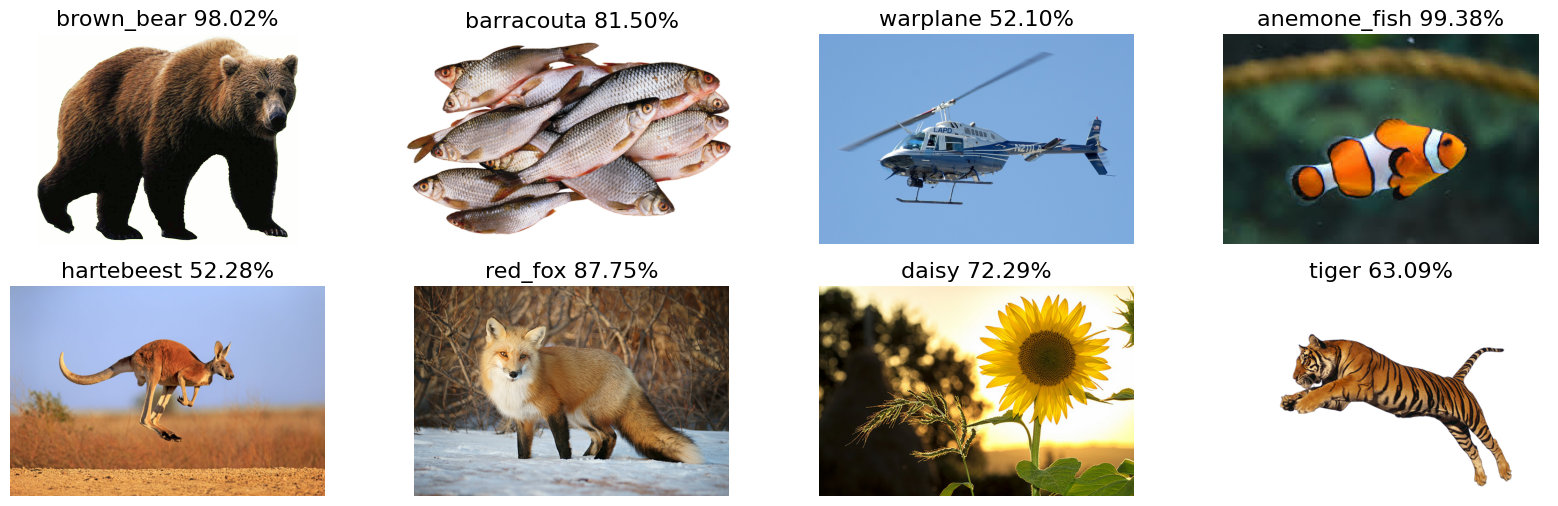

In [71]:
model = model_vgg16
size = (224, 224)

preprocess_input = tf.keras.applications.vgg16.preprocess_input

process_images(model, image_paths, size, preprocess_input)


(1, 224, 224, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
(1, 224, 224, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step
(1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
(1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
(1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
(1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
(1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
(1, 224, 224, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


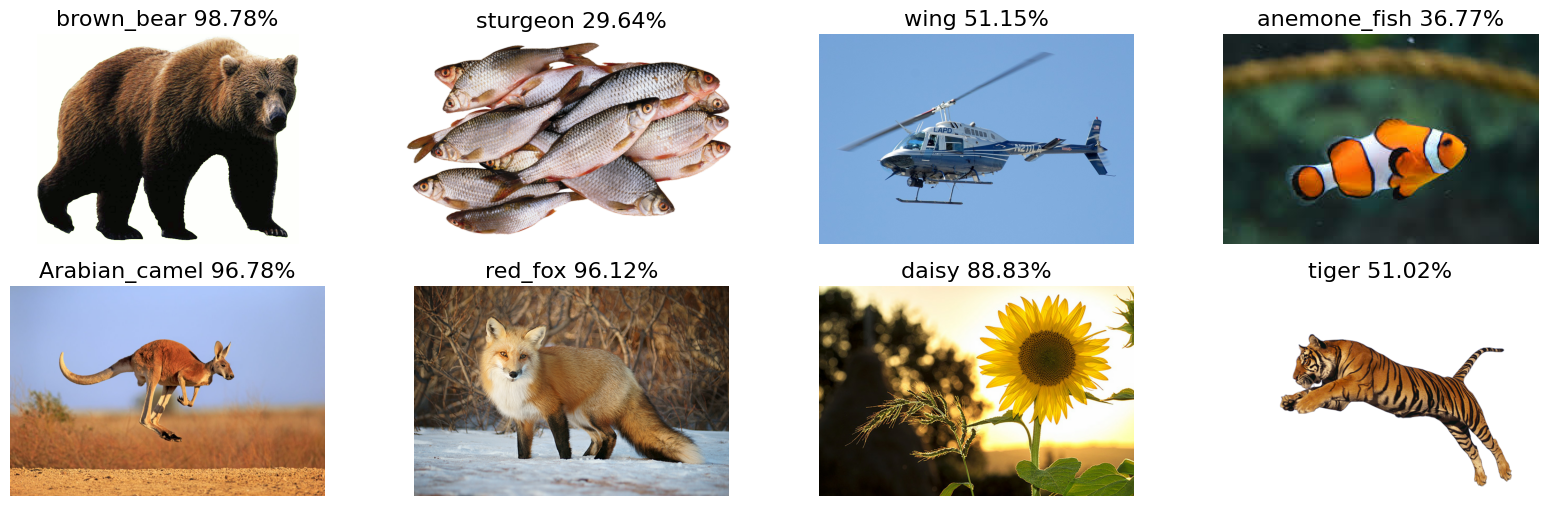

In [72]:
model = model_resnet50
size = (224, 224)

preprocess_input = tf.keras.applications.resnet50.preprocess_input

process_images(model, image_paths, size, preprocess_input)

(1, 299, 299, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
Top 1 predicted class:   Pr(Class=wing                 [index=   0]) = 72.10
Top 2 predicted class:   Pr(Class=warplane             [index=   1]) = 11.67
(1, 299, 299, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step
Top 1 predicted class:   Pr(Class=wallaby              [index=   0]) = 74.08
Top 2 predicted class:   Pr(Class=hare                 [index=   1]) =  1.22
(1, 299, 299, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
Top 1 predicted class:   Pr(Class=red_fox              [index=   0]) = 90.83
Top 2 predicted class:   Pr(Class=kit_fox              [index=   1]) =  4.46
(1, 299, 299, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step
Top 1 predicted class:   Pr(Class=daisy                [index=   0]) = 92.02
Top 2 predicted class:   Pr(Class=vase                 [index=   1]) =  0.42


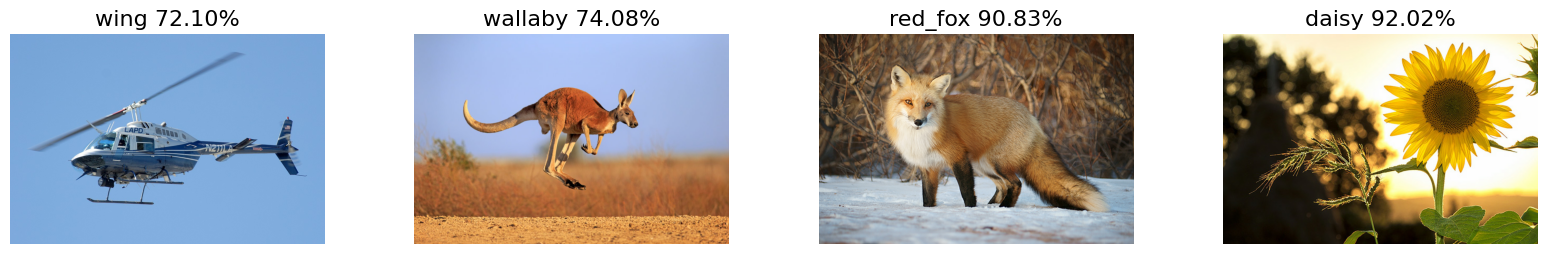

In [63]:
model = model_inception_v3
size = (299, 299)
# image_path=["/content/c-wings.jpg"]
preprocess_input = tf.keras.applications.inception_v3.preprocess_input

process_images(model,image_paths, size, preprocess_input, display_top_k=True)
